## Pump-it-up project
### The Selection of the Model and Prediction for the validation data.

### Import of libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)


In [2]:
pylab.rcParams["figure.figsize"] = (20,14)

In [3]:
X_train = pd.read_csv("../input/pump-it-up-data-mining-the-water-table/train.csv")
y_train = pd.read_csv("../input/pump-it-up-data-mining-the-water-table/labels.csv")
X_test = pd.read_csv("../input/pump-it-up-data-mining-the-water-table/test.csv")

train_df = X_train.merge(y_train, how='outer', left_index=True, right_index=True)

## Descriptive statistics

In [4]:
train_df.head()

,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_y,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [5]:
train_df.describe()

,id_x,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,id_y
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,37115.131768
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,21453.128371
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,18519.750000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,37061.500000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,55656.500000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,74247.000000


I examine the data distribution using these tables. I notice that the min of the feature variables has multiple missing values. This refers to the existence of missing values that must be addressed before moving forward with the models.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are 59400 records in the training set, with 41 columns/features. The column status group displays the label for each pump, while the remaining 40 variables correspond to the attributes, with 10 being numeric and the rest being category. I'll start by looking into the numerical ones.

## First estimate of the accuracy

Next I will observe the distribution of the target variable label in train that will serve us for the calculations of our predictions.

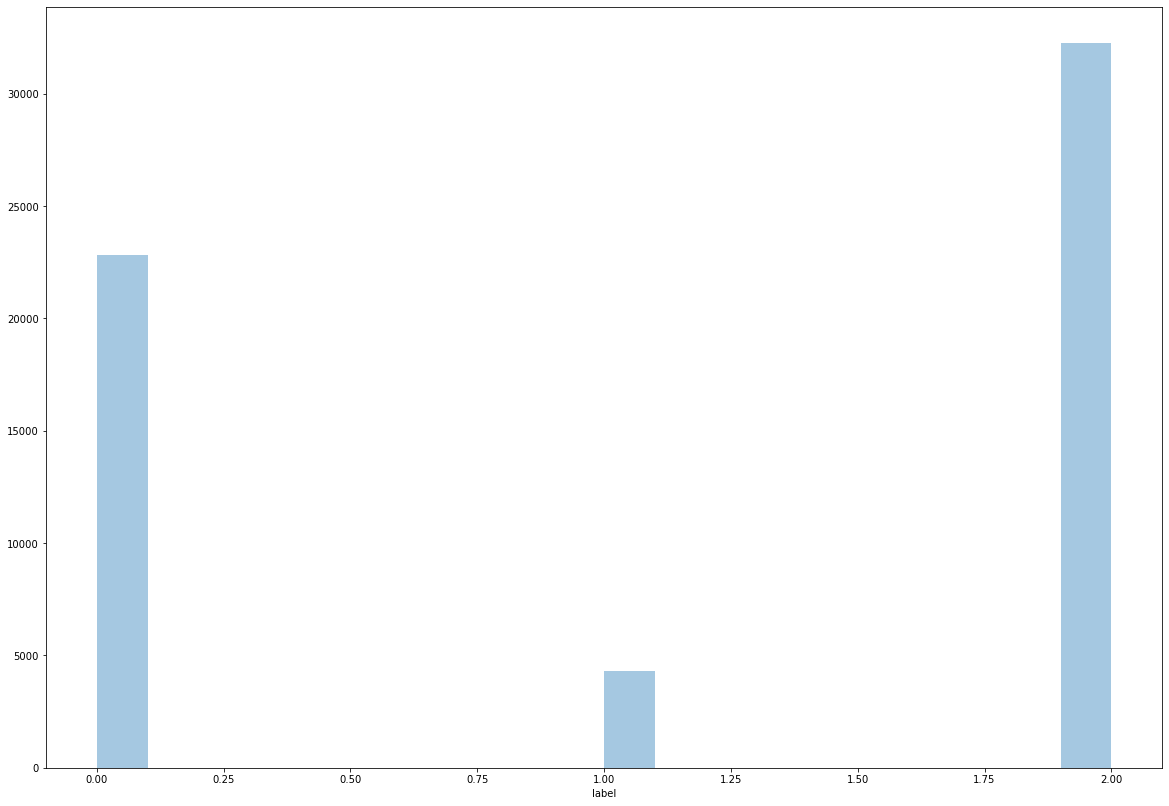

In [7]:
label_dict = {"functional":2,"functional needs repair":1,"non functional":0}
train_df["label"] = train_df["status_group"].map(label_dict)
sns.distplot(train_df["label"],kde=False)

In [8]:
majority_class = train_df['status_group'].mode()[0]
print("The most frequent label is", majority_class)

y_prelim_pred = np.full(shape=train_df['status_group'].shape, fill_value=majority_class)
accuracy_score(train_df['status_group'], y_prelim_pred)

The most frequent label is functional


0.543080808080808

It means that I can start to estimate the 54.31% probability that any one pump in this database will work fine (that is, it is *functional*). This will be used to make future predictions.

Since our target variable is discrete, I will need a supervised classification algorithm, which I will apply later.

## Numerical Variables

In [9]:
numerical_vars = [col for col in train_df.columns if 
                train_df[col].dtype in ['int64', 'float64']]

### construction_year

I are going to make a graph of this variable and the number of pumps built in that year.

Text(0, 0.5, 'Number of pumps constructed')

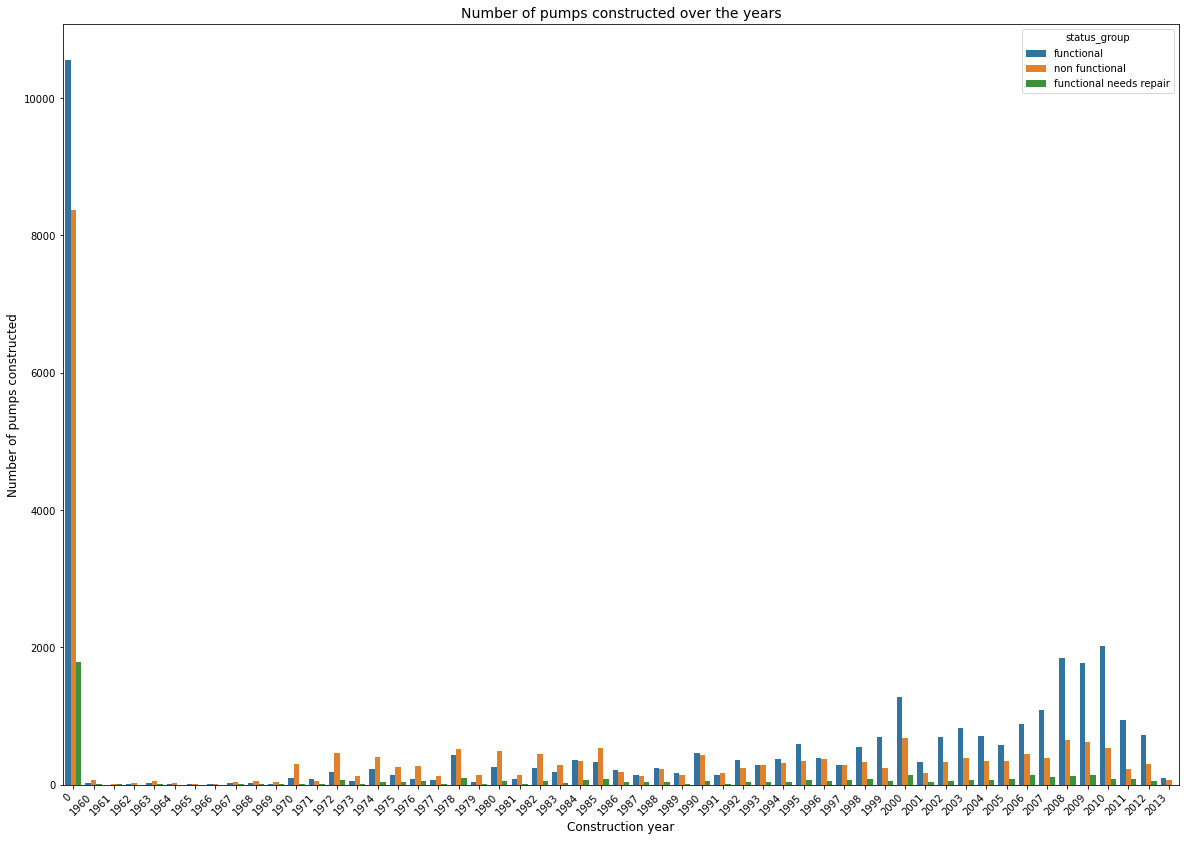

In [10]:
sns.countplot(x=train_df["construction_year"],hue=train_df["status_group"])
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Number of pumps constructed over the years", fontsize=14)
plt.xlabel("Construction year", fontsize=12)
plt.ylabel("Number of pumps constructed", fontsize=12)

I've noticed that the majority of the ones made before 1985 don't operate, but the ones created after that do. This means that i can utilize this property to make predictions in the model. The number of pumps in need of repair does not appear to be excessive, and it has been consistent over time. Rows with a year of construction of zero should be examined.

###  *amount_tsh*

The amount of water left in a well is represented by this variable. It could be beneficial in determining whether or not your pump is operational.

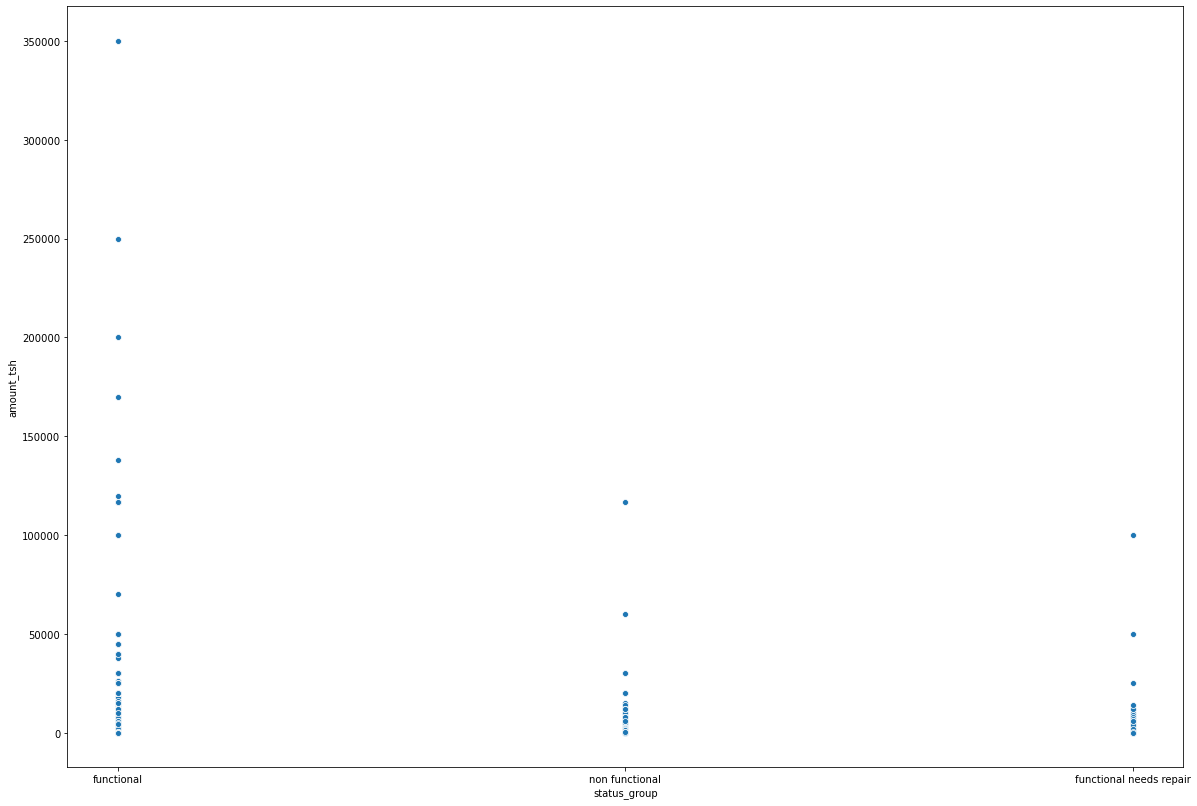

In [11]:
sns.scatterplot(y=train_df["amount_tsh"],x=train_df["status_group"])

If *amount_tsh* is greater than 150,000, the pump is most likely working.

### Distribution of numerical variables

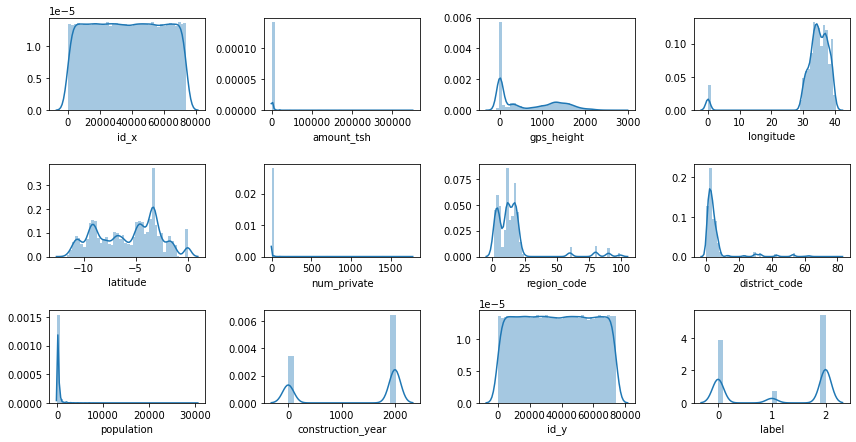

In [12]:
fig = plt.figure(figsize=(12,18))
sns.distributions._has_statsmodels=False
for i in range(len(numerical_vars)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(train_df[numerical_vars].iloc[:,i].dropna())
    plt.xlabel(numerical_vars[i])

plt.tight_layout()
plt.show()

### Atypical values

The visualization of the data makes us suspect the possible existence of outliers or *outliers* in our data:

#### Univariate Analysis: Box Plots for Numeric Attributes

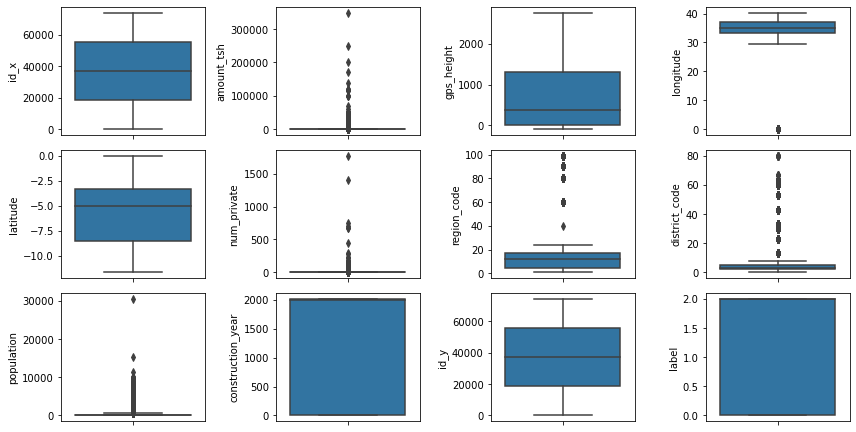

In [13]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(numerical_vars)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=train_df[numerical_vars].iloc[:,i])

plt.tight_layout()
plt.show()

#### Bivariate Data Analysis: Scatter Plots for Target vs. Numeric Attributes

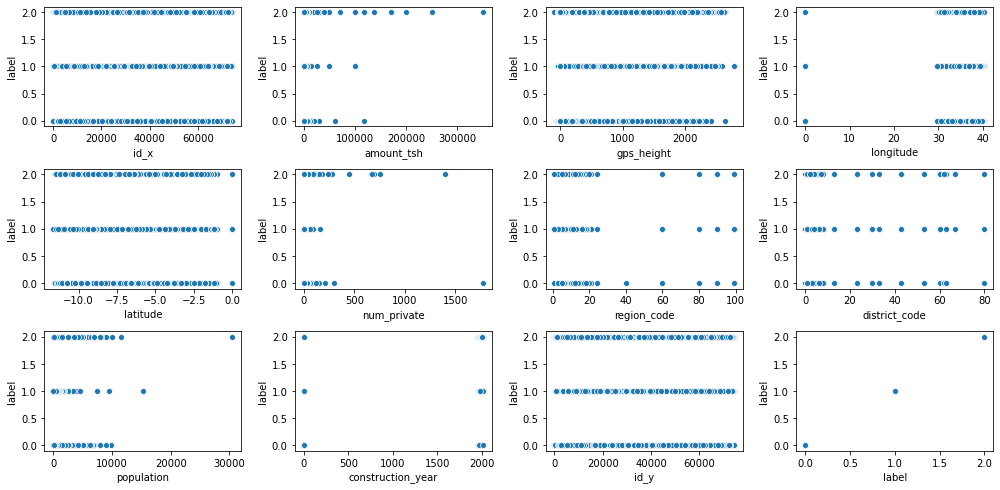

In [14]:
f = plt.figure(figsize=(14,20))

for i in range(len(numerical_vars)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(train_df[numerical_vars].iloc[:,i], train_df["label"])
    
plt.tight_layout()
plt.show()

I observe the following:
- *amount_tsh* (> 200000) 
- *population* (> 13000)

### Correlation between variables

This section displays the correlation between variables. It should be noted that the presence of outliers can have an impact on this.

In order to improve the model using linear regression, it is required to exclude variables that are highly associated.

The following is a graph of the correlation:

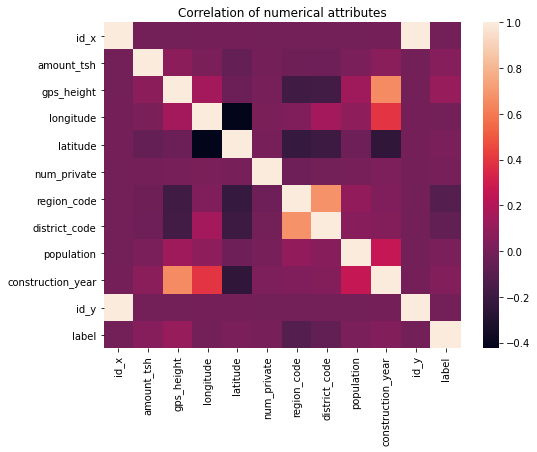

In [15]:
correlation = train_df.corr()

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation)

The connection between district_code and region_code is pretty high, as we can see. As a result, one of them may need to be eliminated.

The correlation between construction_year and gps_height is also high, but these two variables do not have such an obvious relationship, so we will investigate it further before making any decisions.

The most associated variables in connection to label are:

In [16]:
correlation['label'].sort_values(ascending=False)

label                1.000000
gps_height           0.114029
amount_tsh           0.053702
construction_year    0.043342
population           0.017759
latitude             0.014547
num_private          0.005021
id_y                -0.004049
id_x                -0.004049
longitude           -0.004366
district_code       -0.065687
region_code         -0.108640
Name: label, dtype: float64

The region_code has a higher negative linear correlation with the target variable than district_code. I keep the one that has it higher.

All other variables have a low linear correlation with the target variable, but this could indicate a non-linear correlation.

### Missing values in numeric variables

In [17]:
train_df[numerical_vars].isna().sum().sort_values(ascending=False)

label                0
id_y                 0
construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id_x                 0
dtype: int64

##### Population

In [18]:
len(train_df.population[train_df.population == 0])

21381

A possible solution to the problem of missing values ​​could be to make it categorical.

## Categorical variables

In [19]:
cat_vars = train_df.select_dtypes(include='object').columns
print(cat_vars)

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


### Missing values in categorical variables

In [20]:
train_df[cat_vars].isna().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
status_group                 0
extraction_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type_group        0
waterpoint_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
date_recorded                0
dtype: int64

I visualize the categories of *scheme_management*:

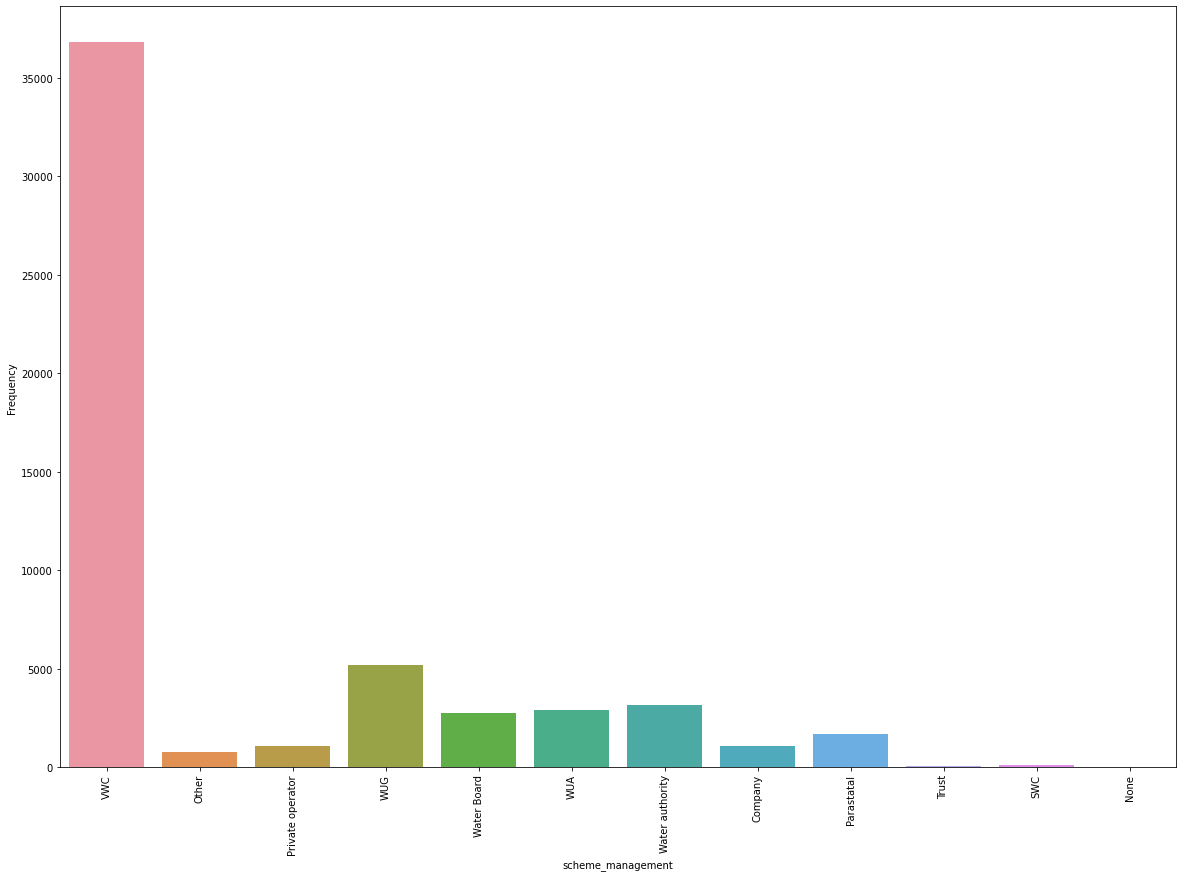

In [21]:
sns.countplot(x='scheme_management', data=train_df)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

## I export the data after the Explotary data analysis

In [22]:
train_df.to_csv("train_df_after_EDA.csv", index=False)
X_test.to_csv("X_test_after_EDA.csv", index=False)

# II.Data preprocessing
In this section I are going to deal with the preprocessing of data, that is, preparing and optimizing them to carry out future *tests* with the *Machine Learning* models.
## Libraries and data import

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline


Next I load the data after analysis:

In [24]:
train_df = pd.read_csv("train_df_after_EDA.csv")
X_test = pd.read_csv("X_test_after_EDA.csv")

## Extraction of similar variables

The following attributes

- *(extraction_type, extraction_type_group, extraction_type_class),*
- *(payment, payment_type),*
- *(water_quality, quality_group),*
- *(source, source_class),*
- *(subvillage, region, region_code, district_code, lga, ward),*
- *(waterpoint_type, waterpoint_type_group)*
- *(scheme_name, scheme_management)*

they provide very similar information, which indicates that there is a high correlation between them. By leaving them, would risk an overfitting.

What's more:

    * num_private consists of 99% zeros and does not have a clear description, so we cannot interpret it
    * wpt_name is not very informative as it has fewer values than the number of observations

Because there is a strong association between the district_code and region_code, I will eliminate a variable between them. The one having the highest correlation with the target variable will be chosen. The region_code has a stronger negative connection with the goal than district_code.

In [25]:
train_df = train_df.drop(['installer','management_group','status_group','id_x','id_y', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)
X_test = X_test.drop(['installer','management_group','id', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'],axis=1)

In [26]:
train_df.head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,label
0,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,True,VWC,False,1999,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,2
1,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,280,NaN,Other,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,2
2,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,250,True,VWC,True,2009,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,2
3,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,True,VWC,True,1986,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,0,True,NaN,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,2


## Missing values

In [27]:
train_df["scheme_management"].fillna("unknown", inplace = True)
train_df["public_meeting"].fillna("unknown", inplace = True)
train_df["permit"].fillna("unknown", inplace = True)
train_df["funder"].fillna("unknown", inplace = True)

X_test["scheme_management"].fillna("unknown", inplace = True)
X_test["public_meeting"].fillna("unknown", inplace = True)
X_test["permit"].fillna("unknown", inplace = True)
X_test["funder"].fillna("unknown", inplace = True)

In [28]:
X_test.isna().sum().sort_values(ascending=False)

waterpoint_type      0
source_class         0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
amount_tsh           0
dtype: int64

## Ordinal encoding of categorical data
This methodology was chosen to prevent having too many columns and to provide the model some logic when analyzing the features.

For example, the higher the category in the variable quality_group, the better the water quality and the more probable the pump will perform correctly.

### *quality_group*

In [29]:
train_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [30]:
order_dict_quality = {"good":3,"salty":2,"milky":2,"colored":2,"fluoride":2,"unknown":1}
train_df["quality_group_code"] = [order_dict_quality[item] for item in train_df.quality_group]
del train_df["quality_group"]

X_test["quality_group_code"] = [order_dict_quality[item] for item in X_test.quality_group]
del X_test["quality_group"]

### *quantity_group*

In [31]:
train_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [32]:
order_dict_quantity = {"enough":3,"insufficient":2,"dry":2,"seasonal":2,"unknown":1}
train_df["quantity_group_code"] = [order_dict_quantity[item] for item in train_df.quantity_group] 
del train_df["quantity_group"]

X_test["quantity_group_code"] = [order_dict_quantity[item] for item in X_test.quantity_group] 
del X_test["quantity_group"]

### *payment_type*

In [33]:
train_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [34]:
order_dict_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}
train_df["payment_code"] = [order_dict_payment[item] for item in train_df.payment_type] 
del train_df["payment_type"]

X_test["payment_code"] = [order_dict_payment[item] for item in X_test.payment_type] 
del X_test["payment_type"]

### *public_meeting*

In [35]:
train_df.public_meeting.value_counts()

True       51011
False       5055
unknown     3334
Name: public_meeting, dtype: int64

In [36]:
order_dict_pub_meet = {True:2,False:1,"unknown":0}
train_df["public_meeting_code"] = [order_dict_pub_meet[item] for item in train_df.public_meeting] 
del train_df["public_meeting"]

X_test["public_meeting_code"] = [order_dict_pub_meet[item] for item in X_test.public_meeting] 
del X_test["public_meeting"]

### *permit*

In [37]:
train_df.permit.value_counts()

True       38852
False      17492
unknown     3056
Name: permit, dtype: int64

In [38]:
order_dict_permit = {True:2,False:1,"unknown":0}
train_df["permit_code"] = [order_dict_pub_meet[item] for item in train_df.permit] 
del train_df["permit"]

X_test["permit_code"] = [order_dict_pub_meet[item] for item in X_test.permit] 
del X_test["permit"]

## More improvements to the model

Next we will create new variables (based on the characteristics of our * dataset *) that will describe the target in a more optimal way.

### *amount_tsh*
I developed a criteria to differentiate the pumps that work from those that don't after the exploratory analysis of the data. I'll go ahead and build a new binary variable to reflect this information.

In [39]:
train_df.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
train_df.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

X_test.loc[train_df['amount_tsh'] < 200000, 'amount_tsh'] = 0
X_test.loc[train_df['amount_tsh'] >= 200000, 'amount_tsh'] = 1

### *construction_year*
 I then transform construction_year into a categorical variable containing the following decades of years: '60s',' 70s', '80s',' 90s, '00s',' 10s' and 'unknown' for unknown years.

In [40]:
def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_wrangler(row), axis=1)
X_test['construction_year'] = X_test.apply(lambda row: construction_wrangler(row), axis=1)

### *date_recorded*
We will calculate the number of days indicated by the *date_recorded* variable in which the data was obtained for a specific pump, up to the most recent date of the *dataset*. The idea is that those stored in our data in a more recent era are more likely to work correctly.
We will start by converting the column into one of type *datetime*.

In [41]:
train_df.date_recorded = pd.to_datetime(train_df.date_recorded)
X_test.date_recorded = pd.to_datetime(X_test.date_recorded)

train_df.date_recorded.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

The most recent data is from March 12, 2013.

In [42]:
train_df['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(train_df.date_recorded)
train_df['days_since_recorded'] = train_df['days_since_recorded'].astype('timedelta64[D]').astype(int)

X_test['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(X_test.date_recorded)
X_test['days_since_recorded'] = X_test['days_since_recorded'].astype('timedelta64[D]').astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [43]:
train_df['days_since_recorded']

0         995
1         272
2         281
3         309
4         874
         ... 
59395     214
59396     941
59397     967
59398    1001
59399     986
Name: days_since_recorded, Length: 59400, dtype: int64

In [44]:
train_df = train_df.drop("date_recorded",axis=1)
X_test = X_test.drop("date_recorded",axis=1)

In [45]:
train_df.shape

(59400, 23)

In [46]:
X_test.shape

(14850, 22)

## *One-Hot* encoding for categorical variables

For categorical variables where there is no order relationship, integer encoding is generally not appropriate. In these cases, special encoding can be applied where a new binary variable (with true or false values) is added for each possible category value.
The One-Hot encoding is a method of labeling which class the data belongs to and the idea is to assign 0 to the entire dimension except 1 for the class the data belongs to.

In [47]:
cat_vars = train_df.select_dtypes(include='object').columns
print(cat_vars)
len(cat_vars)

Index(['funder', 'basin', 'scheme_management', 'construction_year',
       'extraction_type', 'management', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')


9

In [48]:
from sklearn.preprocessing import OneHotEncoder

# I apply the One-Hot-Encoder method for each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[cat_vars])).astype(np.int64)
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[cat_vars])).astype(np.int64)

# The method removes the index, it is put back
OH_cols_train.index = train_df.index
OH_cols_test.index = X_test.index

OH_cols_train.columns = OH_encoder.get_feature_names(cat_vars)
OH_cols_test.columns = OH_encoder.get_feature_names(cat_vars)

# Categorical columns are removed
num_X_train = train_df.drop(cat_vars, axis=1)
num_X_valid = X_test.drop(cat_vars, axis=1)

# One-Hot-Encoder columns are added to numeric attributes
OH_train_df = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_valid, OH_cols_test], axis=1)

In [49]:
OH_train_df.head()

amount_tsh  gps_height  longitude   latitude  region_code  district_code  \
0         0.0        1390  34.938093  -9.856322           11              5   
1         0.0        1399  34.698766  -2.147466           20              2   
2         0.0         686  37.460664  -3.821329           21              4   
3         0.0         263  38.486161 -11.155298           90             63   
4         0.0           0  31.130847  -1.825359           18              1   

   population  label  quality_group_code  quantity_group_code  payment_code  \
0         109      2                   3                    3             4   
1         280      2                   3                    2             2   
2         250      2                   3                    3             3   
3          58      0                   3                    2             2   
4           0      2                   3                    2             2   

   public_meeting_code  permit_code  days_since_recorded  funder_0  \
0                    2            1                  995         0   
1                    0            2                  272         0   
2                    2            2                  281         0   
3                    2            2                  309         0   
4                    2            2                  874         0   

   funder_A/co Germany  funder_Aar  funder_Abas Ka  funder_Abasia  \
0                    0           0               0              0   
1                    0           0               0              0   
2                    0           0               0              0   
3                    0           0               0              0   
4                    0           0               0              0   

   funder_Abc-ihushi Development Cent  funder_Abd  funder_Abdala  \
0                                   0           0              0   
1                                   0           0              0   
2                                   0           0              0   
3                                   0           0              0   
4                                   0           0              0   

   funder_Abddwe  funder_Abdul  funder_Abood  funder_Abs  funder_Aco/germany  \
0              0             0             0           0                   0   
1              0             0             0           0                   0   
2              0             0             0           0                   0   
3              0             0             0           0                   0   
4              0             0             0           0                   0   

   funder_Acord  funder_Acord Ngo  funder_Acra  funder_Act  funder_Act Mara  \
0             0                 0            0           0                0   
1             0                 0            0           0                0   
2             0                 0            0           0                0   
3             0                 0            0           0                0   
4             0                 0            0           0                0   

   funder_Action Aid  funder_Action Contre La Faim  funder_Action In A  \
0                  0                             0                   0   
1                  0                             0                   0   
2                  0                             0                   0   
3                  0                             0                   0   
4                  0                             0                   1   

   funder_Adap  funder_Adb  funder_Adf  funder_Adp  funder_Adp Bungu  \
0            0           0           0           0                 0   
1            0           0           0           0                 0   
2            0           0           0           0                 0   
3            0           0           0           0                 0   
4            0           0           0         

## Attribute selection
### Regularization with Logistic Regression

In L1 regularization, the complexity C is measured as the mean of the absolute value of the model coefficients. With it, I favor that some of the coefficients end up being 0. This can be useful to discover which of the input attributes are relevant and, in general, to obtain a model that generalizes better. L1 helps us make the selection of input attributes.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X, y = OH_train_df[OH_train_df.columns.drop("label")], OH_train_df['label']

logistic = LogisticRegression(solver="saga",C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

In [ ]:
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]

In [ ]:
len(selected_columns)

In [ ]:
selected_columns

In [ ]:
train_df_selected_features = OH_train_df[selected_columns].join(y)

In [ ]:
X_test_selected_features = OH_X_test[selected_columns]

### Importance of attributes with *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',min_samples_split=8, n_estimators=1000,
                           random_state = 7)
rf.fit(X, y)

In [ ]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp = imp_df(X.columns, rf.feature_importances_)
top_30_imp = base_imp[0:30]
top_30_features = top_30_imp.feature

In [ ]:
pylab.rcParams["figure.figsize"] = (10,10)

In [ ]:
train_df_final_top_imp = OH_train_df[top_30_features].join(y)
X_test_final_top_imp = OH_X_test[top_30_features]

In [ ]:
train_df_final_top_imp.shape

In [ ]:
train_df_selected_features.shape

## Final *dataframe* export

In [ ]:
train_df_selected_features.to_csv("train_df_final.csv", index=False)
X_test_selected_features.to_csv("X_test_final.csv", index=False)

In part three and last of this work I proceed to select the model.
Tests have been made with different models of 30 and 80 variables and the results appear to be stable in all models. The *set* of 80 variables that I obtained after doing the regularization with logistic regression each time has a higher score, so it has been decided to use the *dataframes* of *selected_features* as the final *input*.

# III. Model selection 
## Data preparation
### Import of libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns', None)

# Machine Learning

# Decision trees    
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

# Assembly Methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

# Gaussian processes
from sklearn.gaussian_process import GaussianProcessClassifier
    
# Generalized Linear Model (GLM)
from sklearn.linear_model import LogisticRegression
    
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
    
# Support Vector Machines (SVM)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC


# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Metrices
from sklearn.metrics import accuracy_score, confusion_matrix

# Principal component analysis
from sklearn import decomposition


In [ ]:
train_df_final = pd.read_csv("train_df_final.csv")
X_test_final = pd.read_csv("X_test_final.csv")

In [ ]:
X_test_final.shape

In [ ]:
train_df_final.shape

### Data division in *train* and *test*

In [ ]:
X = train_df_final.drop("label",axis=1)
y = train_df_final["label"]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [ ]:
X.isnull().values.any()

### *Standard Scaling*

It is a method that transforms your data in such a way that its distribution has a mean of 0 and a standard deviation of 1.
For multivariate data, this is done independently column by column.
Information obtained from:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test_final)

### Principal Component Analysis
I think it is important to mention it even though it did not improve the final score, so it was not included in the model.

In [ ]:
pca = decomposition.PCA(.95)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)

## Model selection
I check the different models in the *validation set*:

### Decision trees

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)

acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_decision_tree

### RandomForest


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

Result with PCA and 30 variables: 80.05

Result without PCA and 30 variables: 80.01

Result with PCA and 80 variables: 82.93

Result without PCA and 30 variables:: 80.91

### GradientBoostingClassifier

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, 
                                max_depth=13,max_features=0.5,
                                min_samples_leaf=14, verbose=5)

GB.fit(X_train, y_train)     
y_pred = GB.predict(X_valid)

acc_GB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_GB

Result with PCA and 30 variables: 77.21

Result without PCA and 30 variables: 78.95

Result without PCA and 80 variables: 79.19

### LightGBM

In [ ]:
LGB = LGBMClassifier(objective='multiclass', learning_rate=0.75, num_iterations=100, 
                     num_leaves=50, random_state=123, max_depth=8)

LGB.fit(X_train, y_train)
y_pred = LGB.predict(X_valid)

acc_LGB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LGB

Result with PCA and 30 variables: 76.52

Result without PCA and 30 variables: 77.88

Result without PCA and 80 variables: 78.47

### BaggingClassifier

In [ ]:
BC = BaggingClassifier(n_estimators=100)
BC.fit(X_train_pca, y_train)     
y_pred = BC.predict(X_valid_pca)

acc_BC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_BC

Result with PCA: 75.98

Result without PCA: 77.33

### XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=5)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

y_pred = xgb.predict(X_valid)
acc_xgb = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_xgb

Result with PCA and 30 variables: 74.3
    
Result without PCA and 30 variables: 75.45
    
Result without PCA and 80 variables 76.1

### ExtraTreesClassifier

In [ ]:
ETC = ExtraTreesClassifier(n_estimators=100)
ETC.fit(X_train, y_train)     
y_pred = ETC.predict(X_valid)

acc_ETC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_ETC

### *Generalized Linear Models* (GLM)

In [ ]:
LG = LogisticRegression(solver="lbfgs", multi_class="multinomial")
LG.fit(X_train, y_train)     
y_pred = LG.predict(X_valid)

acc_LG = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LG

I can use Logistic Regression to validate our attribute creation decisions. This can be done by calculating the coefficient of the attributes in the decision function.
Positive coefficients improve the response (increase the probability) and negative coefficients worsen the response (decrease the probability).

In [ ]:
coeff_df = pd.DataFrame(train_df_final.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LG.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

acc_knn = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_knn

### Classifier *Naive Bayes*

In [ ]:
# GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train,y_train)
gaussianNB.predict(X_valid)

acc_gaussianNB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_gaussianNB

## Comparison of the results of the models

A continuación representaremos gráficamente todos los modelos:

In [ ]:
models = pd.DataFrame({
    'Model': ['LightGBM','Decision Tree','Random Forest', 'KNN', 'Logistic Regression', 
              "XGBoost", "Bagging Classifier",'Gradient Boosting Classifier','Extra Trees'
              ,"GaussianNB"],
    
    'Score': [acc_LGB,acc_decision_tree,acc_rfc, acc_knn, acc_LG,
               acc_xgb,acc_BC,
              acc_GB, acc_ETC,acc_gaussianNB]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

In [ ]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
plt.title('Algorithm accuracy \n')
plt.xlabel('Accuracy in test (%)')
plt.ylabel('Model')

As I can see, the three best models are:

**-*Gradient Boosting Classifier* - 79.19**

**-*Random Forest*- 82.93**

**-*Light GBM*- 78.47**


## Tuning of models and tuning of parameters
It has been decided to adjust the parameters based on the tuning of the three models just mentioned.

In [ ]:
sc = ss()
X = sc.fit_transform(X)
X_test = sc.transform(X_test_final)

# RandomForest

rfc = RandomForestClassifier(criterion='entropy',min_samples_split=8, n_estimators=1000)

rfc.fit(X, y)     

In [ ]:
# GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X, y)     

In [ ]:
# Lightgbm

LGB = LGBMClassifier(objective='multiclass', learning_rate=0.75, num_iterations=100, 
                     num_leaves=40, random_state=123,max_depth=15)

LGB.fit(X, y)

## Best Parameter for Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)

In [ ]:
grid_search.best_params_

In [ ]:
# RandomForest

rfc = RandomForestClassifier(criterion='entropy',min_samples_split=8, n_estimators=1000)

rfc.fit(X, y)    

## Outcome
Finally, I proceed to create the file that I will upload to the *DrivenData* website with the format indicated in *Submission_format.csv*:

In [ ]:
submission_df = pd.read_csv("../input/pump-it-up-data-mining-the-water-table/Submission_format.csv")

In [ ]:
X_test = sc.transform(X_test_final)
submission_df['status_group']=rfc.predict(X_test)

In [ ]:
vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}

submission_df.status_group = submission_df.status_group.replace(vals_to_replace)

In [ ]:
submission_df.to_csv("submission_final_RFC.csv",sep=',', index=False)

## Conclusions

The purpose of this study was to anticipate whether a pump will function or need to be repaired based on information about the pump, the well, its surroundings, who was in charge of it, and the date.

I began by conducting an exploratory data analysis. Calculating precision and separating data into numerical and categorical categories based on their typology. I then looked for outliers, examined and acted on the different correlations between some of the variables, and detected missing data to deal with them later in the preprocessing phase.

I then cleaned and preprocessed the data in the following step. To reduce multicollinearity, I started by eliminating properties that held comparable information. The missing data was then processed, with ordinal type coding for those who needed it and One-Hot type for the rest. Finally, I've added new variables to the target that better characterize it.

After the preprocessing, I have selected with Logistic Regression the 80 most important variables from a total of 90 columns. Finally, various models have been checked and the results shown in a graph, obtaining that the best ones are:
 

* Random Forest - 83.97
* Gradient Boosting Classifier - 79.19
* Light GBM - 78.47